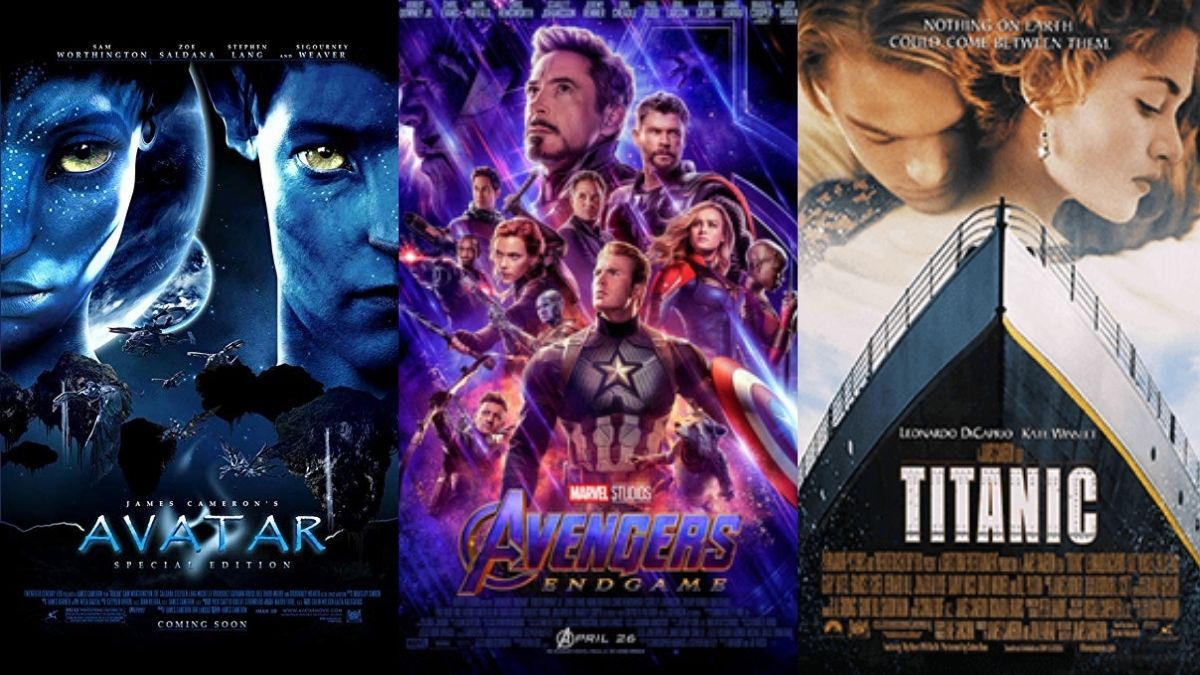

**BUSINESS PROBLEM**

As a data science company we manage to get a customer who seeks to venture into the movie making business.

As astute as the businessman is, he sure knows data-driven decisions would lend him the much needed clarity before investing.
He tasks us with the duty of doing research and providing him with data-driven insights on where to start.
We gear up and scrape for datasets to analyze.

Key guiding points all through is that the businessman seeks to make **profits with the least effort**, astute we called him.
Thus we give much focus and priority to that which is most **profitable and least expensive to make**.

The datasets were acquired from https://github.com/czarina-ds

In [1]:
#import all relevant libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#load the datsets into dataframes
df1=pd.read_csv("C:\\Users\\raymo\\Downloads\\Microsoft Movie Studio\\tngross.csv")
df2=pd.read_csv("C:\\Users\\raymo\\Downloads\\Microsoft Movie Studio\\tnproduction.csv")

In [82]:
df1.head(3)

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564"
1,1,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$379,000,000","$241,071,802","$1,045,713,802"
2,2,"Apr 22, 2015",Avengers: Age of Ultron,"$365,000,000","$459,005,868","$1,395,316,979"


In [5]:
df2.head(3)

,Unnamed: 0,runtime_minutes,genres,production_company,production_country
0,0,181 minutes,Action,Marvel Studios,United States
1,1,136 minutes,Adventure,Walt Disney Pictures,United States
2,2,141 minutes,Action,Marvel Studios,United States


df1 contains the numerical figures while df2 contains extra descriptive information.
We should combine the datasets for a unified analysis,cleaning and visualization

In [22]:
#merge the datasets on a common field
df=df1.merge(df2,on='Unnamed: 0')

In [84]:
#view the new dataset
df.head(1)

,Unnamed: 0,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
0,0,"Apr 23, 2019",Avengers: Endgame,"$400,000,000","$858,373,000","$2,797,800,564",181 minutes,Action,Marvel Studios,United States


In [23]:
#clean the dataset
df.drop('Unnamed: 0',axis=1,inplace=True)

In [24]:
#check and drop all duplicates
df_no__duplicates=df.drop_duplicates()

In [25]:
#drop all null values 
df.dropna(inplace=True)

In [11]:
#check for datatypes of the fields
df.dtypes

release_date          object
movie                 object
production_budget     object
domestic_gross        object
worldwide_gross       object
runtime_minutes       object
genres                object
production_company    object
production_country    object
dtype: object

In [26]:
#convert relevant strings to int for statistical operations
columns_to_clean = ['production_budget','domestic_gross','worldwide_gross']
for col in columns_to_clean:
    df[col] = df[col].str.replace('[\$,]', '', regex=True)
df['production_budget'] = pd.to_numeric(df['production_budget'])
df['domestic_gross'] = pd.to_numeric(df['domestic_gross'])
df['worldwide_gross'] = pd.to_numeric(df['worldwide_gross'])

In [91]:
#check for missing date values
missing_dates = df['release_date'].isna()
missing_dates

0       False
1       False
2       False
3       False
4       False
        ...  
6087    False
6088    False
6089    False
6090    False
6091    False
Name: release_date, Length: 5747, dtype: bool

In [27]:
try:
    parsed_dates = pd.to_datetime(df['release_date'], format='%b %d, %Y')
except ValueError as e:
    print(e)

time data 'Unknown' does not match format '%b %d, %Y' (match)


In [28]:
#convert release_date into datetime python format
from datetime import datetime
date_format = "%b %d, %Y"
df['release_date'] = pd.to_datetime(df['release_date'], format=date_format,errors='coerce')

In [29]:
#remove all 0 values from the numerics as they have no meaning
df = df[~(df['worldwide_gross']==0)]

In [12]:
#check for changes in the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5747 entries, 0 to 6091
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        5686 non-null   datetime64[ns]
 1   movie               5747 non-null   object        
 2   production_budget   5747 non-null   int64         
 3   domestic_gross      5747 non-null   int64         
 4   worldwide_gross     5747 non-null   int64         
 5   runtime_minutes     5747 non-null   object        
 6   genres              5747 non-null   object        
 7   production_company  5747 non-null   object        
 8   production_country  5747 non-null   object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 449.0+ KB


In [42]:
df.head(2)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,136 minutes,Adventure,Walt Disney Pictures,United States


In [30]:
#introduce necessary financial fields e.g., profitability,ROI
df['Profits']=df['worldwide_gross']-df['production_budget']
df['ROI']=df['Profits']/df['production_budget']

In [31]:
#Introduce a field that separates profitable from unprofitable
df['Category']= 'Profitable'
df.loc[df['ROI'] < 1,'Category']='Unprofitable'

In [20]:
#inspect changes
df.head(1)

,release_date,movie,production_budget,domestic_gross,worldwide_gross,runtime_minutes,genres,production_company,production_country,Profits,ROI,Category
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,181 minutes,Action,Marvel Studios,United States,2397800564,5.994501,Profitable


**GENRE ANALYSIS**

In [32]:
#after cleaning the statistical operations may start
#let's exhaust the Genres first to narrow down on which genre is best to pursue
genre_analysis=df[['movie','production_budget','genres','runtime_minutes','ROI','Category']]
genre_analysis.head(3)

,movie,production_budget,genres,runtime_minutes,ROI,Category
0,Avengers: Endgame,400000000,Action,181 minutes,5.994501,Profitable
1,Pirates of the Caribbean: On Stranger Tides,379000000,Adventure,136 minutes,1.759139,Profitable
2,Avengers: Age of Ultron,365000000,Action,141 minutes,2.822786,Profitable


In [25]:
genre_analysis.head(3)

,movie,production_budget,genres,runtime_minutes,ROI,Category
0,Avengers: Endgame,400000000,Action,181 minutes,5.994501,Profitable
1,Pirates of the Caribbean: On Stranger Tides,379000000,Adventure,136 minutes,1.759139,Profitable
2,Avengers: Age of Ultron,365000000,Action,141 minutes,2.822786,Profitable


In [56]:
#since Concert/Performance and Multiple Genres have low counts it would be sensible to drop them as they will affect the mean
genre_analysis = genre_analysis[genre_analysis['genres'] != 'Concert/Performance']
genre_analysis = genre_analysis[genre_analysis['genres'] != 'Multiple Genres']
genre_analysis= genre_analysis[genre_analysis['genres'] != 'None']#None has no signicant meaning to us


In [57]:
genre_analysis['genres'].value_counts()

Drama                1556
Comedy                960
Action                736
Adventure             688
Thriller/Suspense     573
Horror                455
Romantic Comedy       251
Documentary           111
Black Comedy          102
Musical               101
Western                71
Name: genres, dtype: int64

In [58]:
#which genre has the highest ROI by mean and median
#let's first define by mean
genre_mean_roi =genre_analysis.groupby('genres')['ROI'].mean().sort_values(ascending=False)
genre_mean_roi

genres
Horror               10.411487
Musical               5.849120
Documentary           4.713746
Western               3.379252
Adventure             3.116338
Romantic Comedy       2.869508
Drama                 2.787328
Action                2.727429
Comedy                2.557024
Thriller/Suspense     1.930738
Black Comedy          1.816047
Name: ROI, dtype: float64

Horror has the highest ROI measured by mean.
Let's Find by median

In [59]:
genre_median_ROI=genre_analysis.groupby('genres')['ROI'].median().sort_values(ascending=False)
genre_median_ROI

genres
Horror               1.970818
Adventure            1.470881
Romantic Comedy      1.211184
Musical              1.151225
Action               1.092760
Comedy               0.763421
Black Comedy         0.636257
Thriller/Suspense    0.579101
Drama                0.387012
Western              0.294361
Documentary          0.087793
Name: ROI, dtype: float64

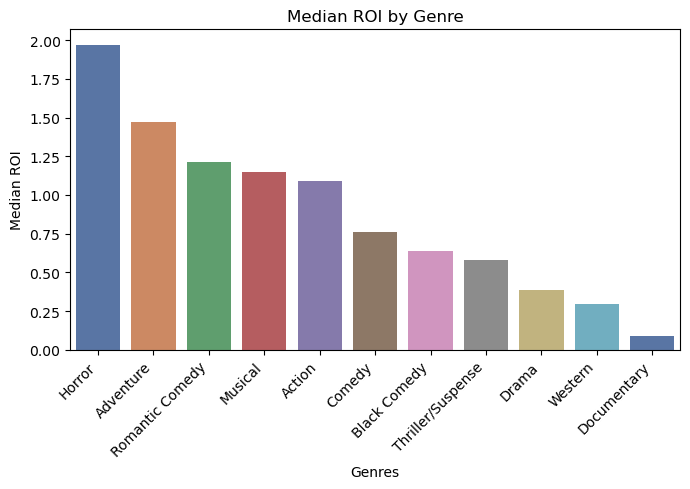

In [60]:
#plot the median to visualize the results
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=genre_median_ROI.index, y=genre_median_ROI.values, palette="deep", ax=ax)
ax.set_xlabel('Genres')
ax.set_ylabel('Median ROI')
ax.set_title('Median ROI by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

From the analysis above, Horror genre has the highest ROI by mean and median.
From a business point of view, this means it would be best to invest/venture into the horror genre as it will give the most returns.

We will now analyze genre by production_budget to deduct which one has a lower barrier to entry.

In [61]:
mean_genre_by_budget=genre_analysis.groupby('genres')['production_budget'].mean().sort_values(ascending=False)
mean_genre_by_budget

genres
Adventure            7.400613e+07
Action               6.668363e+07
Musical              3.351276e+07
Thriller/Suspense    3.071554e+07
Western              2.702064e+07
Romantic Comedy      2.485619e+07
Comedy               2.302602e+07
Black Comedy         1.995882e+07
Drama                1.955646e+07
Horror               1.660346e+07
Documentary          4.010928e+06
Name: production_budget, dtype: float64

In [62]:
genre_by_budget=genre_analysis.groupby('genres')['production_budget'].median().sort_values(ascending=False)
genre_by_budget

genres
Adventure            60000000.0
Action               45000000.0
Thriller/Suspense    22000000.0
Romantic Comedy      20000000.0
Musical              17500000.0
Comedy               17000000.0
Western              14400000.0
Drama                12500000.0
Black Comedy         11900000.0
Horror               10000000.0
Documentary           1000000.0
Name: production_budget, dtype: float64

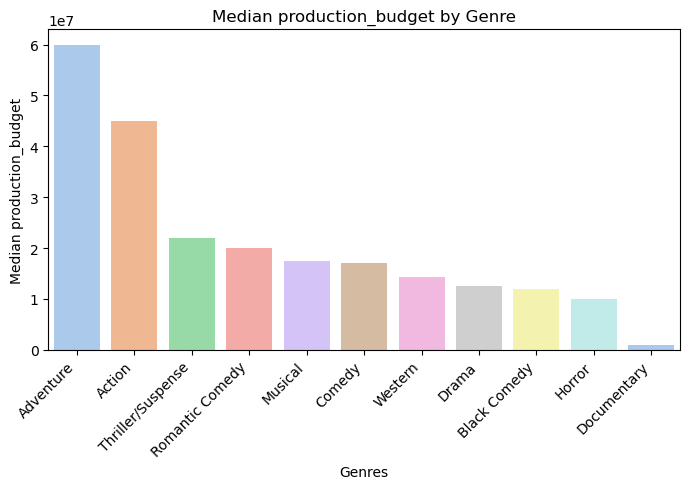

In [73]:
#visualize production_budget analysis
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(x=genre_by_budget.index, y=genre_by_budget.values, palette="pastel", ax=ax)
ax.set_xlabel('Genres')
ax.set_ylabel('Median production_budget')
ax.set_title('Median production_budget by Genre')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Documentary has the lowest budget but has the lowest returns as well.
We would want the genre that has the highest returns and low production budget.

Let's deduce mean and median run_time minutes per genre to see how long a genre averagely runs.

In [47]:
genre_analysis.dtypes

movie                 object
production_budget      int64
genres                object
runtime_minutes       object
ROI                  float64
Category              object
dtype: object

In [35]:
#convert runtime_minutes from strings to int
df['runtime_minutes'] = df['runtime_minutes'].str.replace(' minutes', '')
df['runtime_minutes'] = pd.to_numeric(df['runtime_minutes'], errors='coerce')

In [36]:
df.dtypes

release_date          datetime64[ns]
movie                         object
production_budget              int64
domestic_gross                 int64
worldwide_gross                int64
runtime_minutes              float64
genres                        object
production_company            object
production_country            object
Profits                        int64
ROI                          float64
Category                      object
dtype: object

In [42]:
genre_by_mean_runtime_minutes=df.groupby('genres')['runtime_minutes'].mean().sort_values(ascending=False)
genre_by_mean_runtime_minutes

genres
Multiple Genres        136.500000
None                   121.325000
Western                120.774194
Drama                  117.733819
Musical                116.222222
Action                 114.915515
Thriller/Suspense      110.905325
Romantic Comedy        105.639024
Black Comedy           104.395062
Adventure              104.384858
Comedy                 100.514612
Horror                  98.949622
Documentary             94.545455
Concert/Performance     91.846154
Name: runtime_minutes, dtype: float64

In [70]:
genre_by_median_runtime_minutes=df.groupby('genres')['runtime_minutes'].median().sort_values(ascending=False)
genre_by_median_runtime_minutes

genres
Multiple Genres        136.5
None                   118.5
Western                117.5
Drama                  115.0
Musical                113.0
Action                 112.0
Thriller/Suspense      109.0
Romantic Comedy        104.0
Black Comedy           103.0
Adventure               99.0
Comedy                  99.0
Horror                  96.0
Concert/Performance     93.0
Documentary             93.0
Name: runtime_minutes, dtype: float64

In [57]:
#let's deduce any correlations between the variables to assist us draw a conclusion
df['production_budget'].corr(df['Profits'])

0.6028493028648614

In [68]:
df['runtime_minutes'].corr(df['production_budget'])

0.2725219223865811

In [47]:
df['domestic_gross'].corr(df['worldwide_gross'])

0.9368055540363959

**GENRE ANALYSIS**

1. The most profitable genre is Horror while Documentary is the least profitable
2. The most expensive genre to produce is Adventure and the least expensive being Documentary
3. Western movies have the longest runtime while Documentaries have the shortest runtime
4. There is a signicant positive relationship between profits and production_budget. Meaning its very possible when one increases so will the other.
5.  The strongest relationship amongst all is worldwide_gross and domestic_gross. They are significantly that when one         increases so will the other. When a movie does well domestically, it will surely sell globally.
6. Relationship between airing time and production_budget is insignificantly positive. Meaning there are many other factors at play.

Now that we found the most profitable genre, **Horror**, we will deduce all possible insights about the genre that will assist our customer make data-driven decisions on it.

In [75]:
#deduce which country has the highest domestic gross for horror movies to define appetite for horrors by country
horror_movies = df[(df['genres'] == 'Horror') & (df['Category'] == 'Profitable')]
country_domestic_gross = horror_movies.groupby('production_country')['domestic_gross'].sum().sort_values(ascending=False)
country_domestic_gross.head(4)

production_country
United States                    11780514940
Canada, United States              261790816
United Kingdom, United States      224895226
Australia, United States           204366120
Name: domestic_gross, dtype: int64

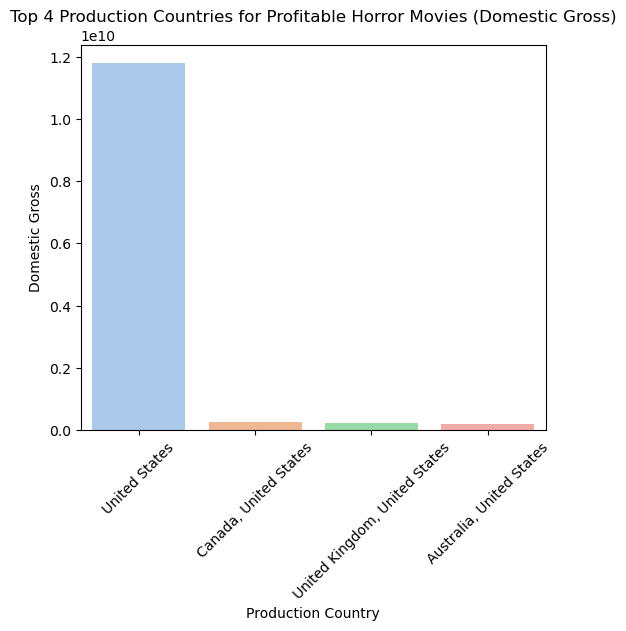

In [76]:
#visualize countries with highest domestic gross for profitable horror movies
plt.figure(figsize=(6, 5))
sns.barplot(x=country_domestic_gross.head(4).index, y=country_domestic_gross.head(4).values, palette="pastel")
plt.title("Top 4 Production Countries for Profitable Horror Movies (Domestic Gross)")
plt.xlabel("Production Country")
plt.ylabel("Domestic Gross")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

plt.show()

In [84]:
#deduce which company has the highest profitable movie count
horror_movies = df[(df['genres'] == 'Horror') & (df['Category'] == 'Profitable')]
company_profitable_horror_counts = horror_movies['production_company'].value_counts().sort_values(ascending=False)
company_profitable_horror_counts.head()

None                                       79
Regency Enterprises                         3
Twisted Pictures, Burg-Knoules, Hoffman     3
Mandate Pictures                            3
Blumhouse, Solana Films                     3
Name: production_company, dtype: int64

In [78]:
#let's see what time of the year Horror movies are mostly released
#convert release date into datetime format
df['release_month'] = pd.to_datetime(df['release_date']).dt.month
horror_movies =df[(df['genres'] == 'Horror') & (df['Category'] == 'Profitable')]
horror_monthly_counts = horror_movies['release_month'].value_counts().sort_values(ascending=False)
horror_monthly_counts

10.0    50
8.0     34
2.0     26
9.0     23
4.0     23
1.0     23
5.0     22
7.0     22
6.0     20
11.0    17
3.0     16
12.0    12
Name: release_month, dtype: int64

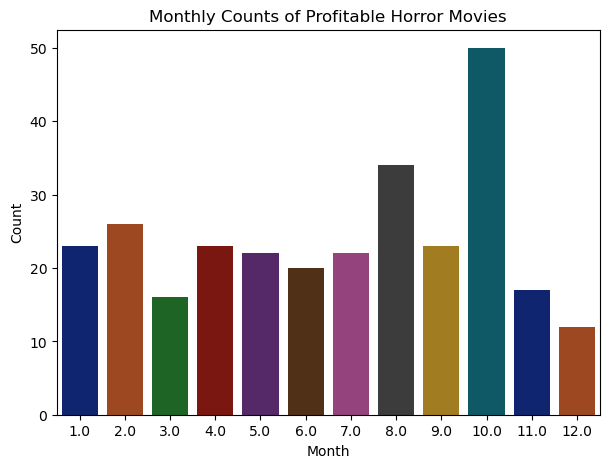

In [79]:
#visualize the best month to release a horror movie
plt.figure(figsize=(7, 5))
sns.barplot(x=horror_monthly_counts.index, y=horror_monthly_counts.values, palette="dark")
plt.title("Monthly Counts of Profitable Horror Movies")
plt.xlabel("Month")
plt.ylabel("Count")
plt.xticks(rotation=0)  # Rotate x-axis labels if needed

plt.show()

C:\Users\raymo\AppData\Local\Temp\ipykernel_8972\2130010438.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_horror_movies['release_year'] = profitable_horror_movies['release_date'].dt.year


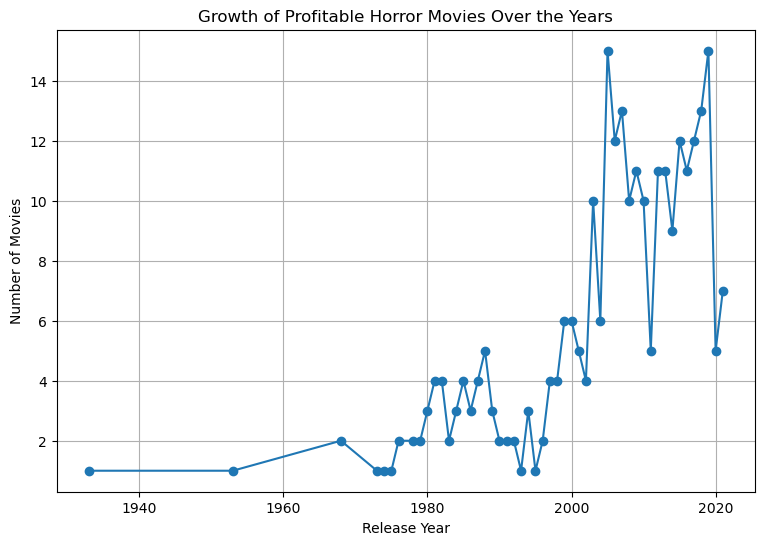

In [135]:
#let's see tgenres'] == 'Horror')he growth of profitable horror movies over the years to see if it's a growing field
profitable_horror_movies = df[(df[' & (df['Category'] == 'Profitable')]
profitable_horror_movies['release_year'] = profitable_horror_movies['release_date'].dt.year
horror_movies_growth = profitable_horror_movies.groupby('release_year').size()
# Create a time-series line plot
plt.figure(figsize=(9, 6))
plt.plot(horror_movies_growth.index, horror_movies_growth.values, marker='o', linestyle='-')
plt.title('Growth of Profitable Horror Movies Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.grid(True)

# Show the plot
plt.show()

In [83]:
#finally it would be a good idea to know the percentage share of profitable horror movies in the datset
horror_genre=df[df['genres'] == 'Horror']
horror_genre['Category'].value_counts(normalize=True)*100

Profitable      63.956044
Unprofitable    36.043956
Name: Category, dtype: float64

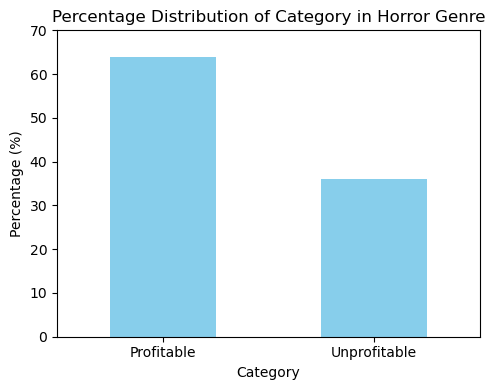

In [86]:
#visualize the percentage share
category_distribution = horror_genre['Category'].value_counts(normalize=True) * 100
plt.figure(figsize=(5, 4))
category_distribution.plot(kind='bar', color='skyblue')
plt.title('Percentage Distribution of Category in Horror Genre')
plt.xlabel('Category')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.ylim(0,70)
plt.tight_layout()
plt.show()

**HORROR MOVIES INSIGHTS**

1. Run for 96-98 minutes
2. October has the highest count of profitable horror movies release
3. Run on an estimated budget of $10 -10.6 M, the second cheapest genre to produce.
4. Have a median and a mean Return on investment of *1.9 and *10 respectively
5. United States has the biggest apetite for Horror movies making it the best bet for a profitable production_country choice.
   
6. It's very advisable to produce in the US as we've seen domestic success assures more than 90% of global success.
7. Regency Enterprises,Twisted Pictures, Burg-Knoules, Hoffman,Mandate Pictures and Blumhouse, Solana Films have the highest
   profitable movie count making them your go-to production companies.
8. Profitable Horror movies have been growing over the years reaching record heights in 2019 and did rise again in 2021 after
   a sharp fall in 2020
9. 63.9 % of all produced horror movies across the years were profitable. A positive indicator of audience appreciation of the    genre

NB: We use median as a measure of tendency because it's independent from outliers

**CONCLUSION**

After an exhaustive analysis on the dataset we were able to advise our customer to venture into the movie production business via **Horror movies!**
